In [ ]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
#model and 
import math
from utils import *
from tqdm import tqdm
from models import MSE,MDcR,DSE,MVBG,CPCA,DPCA,MVP,LPP,LE
import scipy
datasets_names = ['BBC','MSRC-v1','NGs','Reuters','YALE']
# datasets_names = ['Reuters']

for dt_name in datasets_names:
    # data
    X,labels=read_data(f'datasets/data sets/{dt_name}.mat')
    X = [X[0,i].T for  i  in range(X.shape[1])]
    X =  [x[:300,:500] for x in X] #d<=300 ,n = X[0].shape[1]
    if isinstance(X[0],scipy.sparse._csr.csr_matrix):
        X =   [np.asarray(x.todense()) for x in X]
    labels  = labels.squeeze()
    k = len(set(labels))
    #models
    model_list =  [MSE(), MDcR(),DSE(),MVBG(0.1,2,0.1), CPCA(),DPCA(), MVP(),LPP(),LE()]
    #main 
    res_nmi = [];res_acc =[];res_ari=[];res_purity  = []
    train_ratio=0.1
    d_max  =  min(math.floor((1-train_ratio)*X[0].shape[1]),int(np.min([x.shape[0] for x in X])) ) #min(d,測試x的維數)
    d_range  = range(k,d_max)
    model  =  MDcR()

    for d_ in tqdm(d_range): 
        nmi_list = [];acc_list =[]; ari_list=[]; purity_list=[]
        for i in range(5):
            # train_test split
            train_idx,test_idx = random_index(X[0].shape[1],train_ratio)
            X_train = [x[:,train_idx] for x in X]
            X_test = [x[:,test_idx] for x in X]
            y_test = labels[test_idx]
            #train

            # pred =  model.predict(X_test,0.5,2,1e6,d_,k,10) #MVP ok
            # pred   = model.predict(X_train,X_test,1e7,d_,k,200) #lPP ok 
            # pred  = model.predict(X_test,d_,20,k) #LE ok
            # pred = model.predict(X_train,X_test,d_,k) #DPCA ok
            # pred =  model.predict(X_test,0.5,d_,1e8,k,100) #MSE ok
            pred   =  model.predict(X_test,d_,1e8,5,100,100)#mdcr ok
            # pred = model.predict(X_test,d_max,d_,k,1e8,30)# m: >=dmax ok mvbg
            # pred = model.dse(X_test,k,2,100) #dse 
            # pred  = model.predict(X_train, X_test,d_,k) #CPCA
            # criterion
            #nmi
            from sklearn.metrics.cluster import normalized_mutual_info_score,adjusted_rand_score
            from sklearn.metrics import homogeneity_score

            nmi = normalized_mutual_info_score(y_test,pred)
            nmi_list.append(nmi)
            #acc
            acc =   acc_score(y_test,pred)
            acc_list.append(acc)
            #ari
            ari =   adjusted_rand_score(y_test,pred)
            ari_list.append(ari)
            #purity
            purity  =  purity_score(y_test,pred)
            purity_list.append(purity)
        #
        nmi = np.mean(nmi_list)
        acc  = np.mean(acc_list)
        ari = np.mean(ari_list)
        purity = np.mean(purity_list)
        # 
        res_nmi.append(nmi)
        res_acc.append(acc)
        res_ari.append(ari)
        res_purity.append(purity)
    np.save(f'./result/nmi/{dt_name}/{model.name}.npy',res_nmi)
    np.save(f'./result/acc/{dt_name}/{model.name}.npy',res_acc)
    np.save(f'./result/ari/{dt_name}/{model.name}.npy',res_ari)
    np.save(f'./result/purity/{dt_name}/{model.name}.npy',res_purity)

    #plot
    import matplotlib.pyplot as plt
    plt.figure(figsize=(3,2))
    plt.plot(d_range,res_nmi)


  0%|          | 0/5 [00:00<?, ?it/s]

1.091941887205968
1.073930779656458
1.083896014801316
1.088320406158889
1.0955793831764595
1.0899834019082761
1.0752268460790844
1.0757642249277177
1.0906169315169567
1.0780378117841847
1.0888302944909156
1.080880887415031
1.0698514490307645
1.079406374062622
1.072612901880143
1.0850260610356757
1.0901602321192154
1.0763205896158667
1.0860442127906866
1.0831566854581127
1.085086026992613
1.0946457030980354
1.0971358024975362
1.0965263183875071
1.0951747714415045
1.0928868772281417
1.079476612154084
1.0785269245214155
1.0848392031434022
1.0948602781766623
1.072766124709667
1.0998232444137181
1.0809574569560105
1.0906916488714429
1.0845484259974314
1.087242772836476
1.0804039958217793
1.0837399023260876
1.0749621614838079
1.0899762545080889
1.0994387066299267
1.0980991515167482
1.0832858889105172
1.0913753880235126
1.0901325517238711
1.0751480372342743
1.0710064272376132
1.0810839991999361
1.099655952177654
1.081865652816354
1.0964829234054592
1.0819225951693332
1.0845122655589603
1.0858

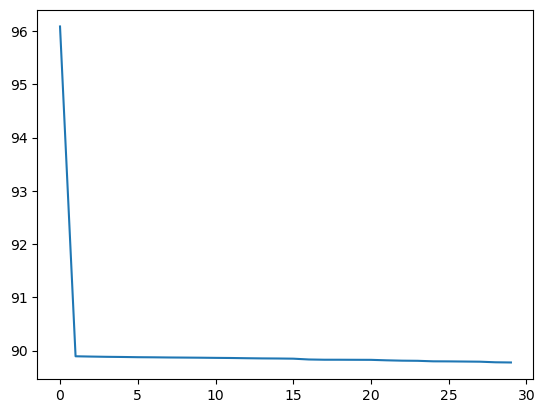

1.0878636900315848
1.083533636839292
1.0827998322187342
1.0738661140283075
1.0767742748328604
1.0876340798114434
1.0862418394771636
1.0812836753568433
1.0837068091659474
1.0976186614582466
1.0761031646689
1.0848443778183947
1.085250721906632
1.079042839226068
1.0869282134073854
1.0781623902417046
1.0799540817895343
1.0848366751374228
1.0909183879918354
1.0862510295884475
1.0997505625088344
1.084810495781763
1.0925621479711163
1.0795999999342083
1.0862124934930821
1.075313983575815
1.0822569089134055
1.0834935546493232
1.0839281320791154
1.082088076913346
1.0812206676045613
1.090075092808718
1.0975742356438343
1.0771416295493004
1.0885287539608883
1.0845107270688135
1.071894101265991
1.0911535325353234
1.0910208472788085
1.083036394215679
1.0997473437521021
1.0911976224815354
1.0897812575996206
1.0679741484698706
1.0955743762066357
1.079713251717914
1.084616981416356
1.0808021232439804
1.0880589832788856
1.0974261904519425
1.090943570264446
1.085829150786067
1.078240778260751
1.09048455

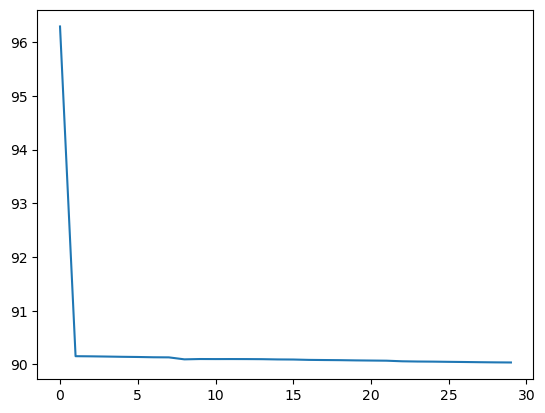

1.0892396938772069
1.0905435433247068
1.0912132621804083
1.085994676476647
1.079295471402045
1.0907800001622245
1.094874321759566
1.0850229807004337
1.0863124068139065
1.0822244547158468
1.0855639829341794
1.0911716095415964
1.096929828024551
1.0999831073379207
1.0952848179913295
1.085128151527659
1.0878800400785376
1.0836412650675473
1.078848412717354
1.0993300493536078
1.0896174950395758
1.0736358327842468
1.091203353607328
1.0869912074158337
1.0876234026618947
1.0895312800477495
1.0948591854023972
1.0829667230315936
1.0967831050006538
1.0818593213650303
1.0871867651976057
1.0887120361375642
1.091513498075868
1.0980683405174845
1.0981820379814566
1.0836113775751248
1.089143138513192
1.0928915250076656
1.0949028797998492
1.0972628275983038
1.0857274347833759
1.0837407695274455
1.0935641321037575
1.0708283132348497
1.0956479058397193
1.097074085042427
1.09942766860184
1.0959078964049547
1.096578702528466
1.0807531840969862
1.089577659868385
1.077973568821628
1.0934458009421366
1.094926

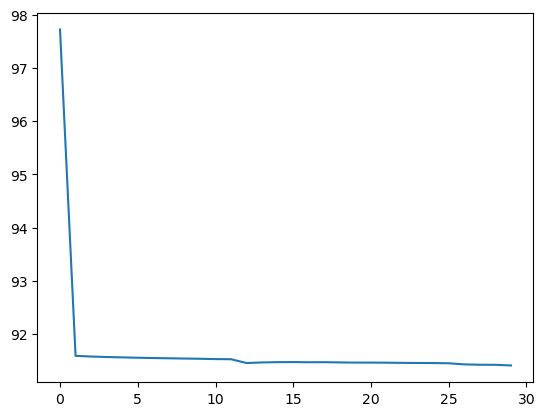

1.0850087778244726
1.083064219505747
1.0987386693230732
1.0916600204003901
1.0948635548473735
1.0996306648865102
1.0904292466303942
1.0783068141112842
1.0928366544264227
1.0995933851589061
1.0909590369121966
1.083234792883994
1.0931737294917898
1.0963473712595386
1.088286552180656
1.0984483735957098
1.0989831879531535
1.08504615123289
1.084938097066823
1.089795533790358
1.0780268968231566
1.075590551022048
1.0987877023618218
1.0835100690995372
1.0816260024139073
1.0995126756200575
1.092754748266299
1.0986193452083477
1.0815266517060254
1.0965425570999217
1.0873994914422698
1.0823138024376475
1.0758017652508525
1.0950514883679054
1.0913277087535675
1.0875002457791374
1.087974558063404
1.091340890214765
1.088176517644095
1.0893878991059418
1.0778542555728359
1.0978755859339606
1.0963678982098117
1.099096747676103
1.091820823432002
1.0795663626519891
1.0802031344977565
1.0881617961884347
1.096126617140885
1.0878524516013879
1.0917631849352996
1.0786895982283358
1.0984466696311515
1.081474

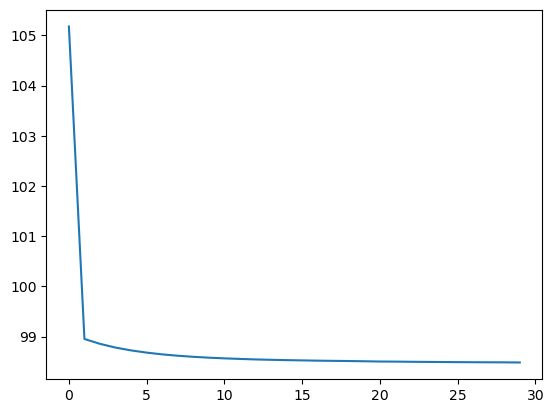

1.0816818567613868
1.0766115256074689
1.0950423021351292
1.0935451534984426
1.0939286039507587
1.0808844233011161
1.089283306916343
1.0833997685553147
1.09992747135351
1.096553111447668
1.0742037057376081
1.0849212558192356
1.0928765141786125
1.0832206641081559
1.0755413644086265
1.0994187248688956
1.08756286778127
1.0795619514690724
1.09139491467374
1.08619672318582
1.0801129233094149
1.0799199178119756
1.086652943318935
1.08687959446873
1.0965916808280443
1.0759343509940469
1.0968828095977257
1.0869812662789768
1.0938971172380594
1.0909361020945543
1.0805659590364143
1.0915818995944784
1.0964137839942683
1.098352329603137
1.085986478268111
1.0813240512724196
1.084473820742276
1.0851799406946543
1.0798416119648326
1.0941017067914212
1.0983120714341248
1.0855068460881003
1.0897269295555874
1.0890774053081194
1.08618889804111
1.0964940616926708
1.0848343231327109
1.0911225021225894
1.0981939679836477
1.0962131410107565
1.087196241869083
1.0939418551077198
1.0745404281673783
1.0985842121

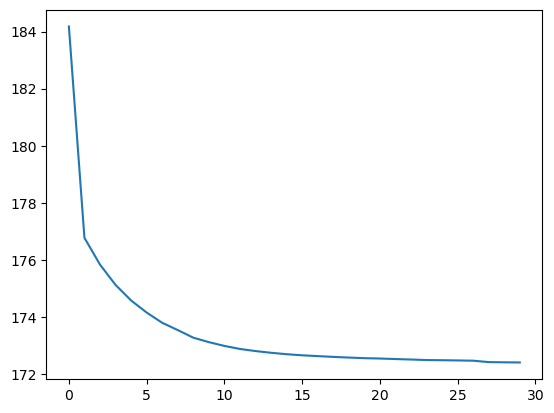

1.0998085613399406
1.0810829777323927
1.0937511224088587
1.086007499184145
1.0874602824518136
1.0833507036481236
1.0922221278752478
1.0783755228252656
1.092873713406513
1.085793462511862
1.0769737342093768
1.0979256452585173
1.07390509375865
1.0788307270501991
1.0920516499889574
1.0867463276573903
1.0948677189283336
1.0909908147560887
1.0895261726068748
1.0935121622689215
1.0835331849087497
1.084568012890736
1.0790648312023499
1.0737973331563175
1.0935389076366215
1.092017331721519
1.0858003296083496
1.081989967677269
1.0751577412225535
1.0744746917598764
1.0879811883007116
1.0892054165091674
1.0770626550390041
1.0872438266417044
1.0780669262928857
1.0803929088769073
1.0832879875483492
1.0894932673374642
1.0967477963487149
1.080914726631335
1.0780686624084261
1.0967228081814386
1.082460551019505
1.0920647422088885
1.08788502560191
1.0925024646689092
1.0914837981264038
1.0879651333997864
1.0797437759418922
1.0950839898713784
1.074273345909165
1.0960963951118556
1.0986309003206913
1.0851

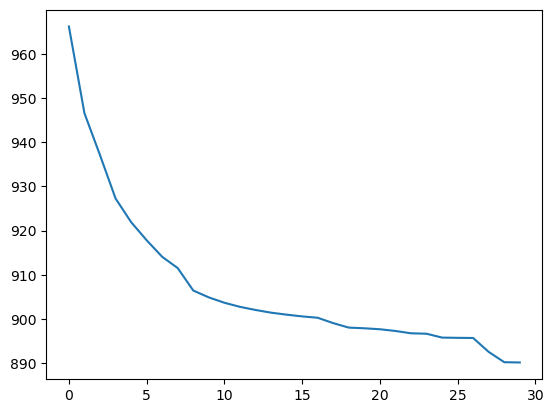

In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
#model and 
import math
from utils import *
from tqdm import tqdm
from models import MVBG
import matplotlib.pyplot as plt
import scipy
datasets_names = ['BBC','MSRC-v1','NGs','Reuters','YALE']
# datasets_names=['YALE']
alpha = [0.001,0.01,0.1,1,10,100,1000]
beta = [0.001,0.01,0.1,1,10,100,1000]
gamma = [1.2, 1.5, 1.8, 2, 4, 6, 8, 10] 

d_ = 20
for dt_name in tqdm(datasets_names):
    # data
    X,labels=read_data(f'datasets/mats/{dt_name}.mat')
    X = [X[0,i].T for  i  in range(X.shape[1])]
    X =  [x[:300,:500] for x in X] #d<=300 ,n = X[0].shape[1]
    if isinstance(X[0],scipy.sparse._csr.csr_matrix):
        X =   [np.asarray(x.todense()) for x in X]
    labels  = labels.squeeze()
    k = len(set(labels))
    train_ratio=0.1
    acc = []
    # for b in beta:
    for a in alpha:
    # for g in gamma:
        # train_test split
        train_idx,test_idx = random_index(X[0].shape[1],train_ratio)
        X_train = [x[:,train_idx] for x in X]
        X_test = [x[:,test_idx] for x in X]
        y_test = labels[test_idx]
        #train
        # model=MVBG(alpha[0],g,beta[0])
        # model =   MVBG(alpha[0],gamma[0],b)
        model   = MVBG(a,gamma[0],beta[0])

        pred = model.predict(X_test,40,d_,k,1e6,30)# m: >=dmax ok mvbg
        #accuracy
        acc.append(acc_score(y_test,pred))
        # print(a)
    
    plt.plot(alpha,acc,label=f"{dt_name}")
    plt.scatter(alpha,acc)
    plt.legend(loc="upper right")
    plt.title('acc with increaing alpha')

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import accuracy_score,homogeneity_score
from sklearn.metrics import f1_score

from utils import *
a = np.array([1,1,2,2,3,3])
b = np.array([3,3,1,2,3,1])
# b  = np.array([1,1,3,2,1,3])

adjusted_rand_score(a,b)
# purity_score(b,b)
purity_score(a,b)


In [ ]:
from utils import *
X,labels=read_data(f'datasets/data sets/Reuters.mat')
X = [X[0,i].T for  i  in range(X.shape[1])]
np.asarray(X[2].todense()).shape

In [ ]:
# np.save('./result/NGs/mvbg_nmi.npy',res_nim)
res_nmi = np.load('./result/nmi/YALE/nmi_DPCA.npy')
res_nmi
